Question 6: Isocontours of Normal Distributions

In [ ]:
%pip install numpy
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, det
from math import pi, sqrt
## Create helper functions to plot the isocontuors 
# Define a function to compute the value of the 2d gaussian pdf at (x,y)
    # mu =  array-like, shape (2,)  -> [mu_x, mu_y]
    # Sigma: 2x2 covariance matrix
def bivar_norm_pdf(x, y, mu, Sigma):
    # convert x,y into a column vector
    xy = np.array([x, y])
    mu = np.array(mu)
    Sig_inv = inv(Sigma)
    diff = xy - mu
    # mahalanobis distance (x-mu)^T*sig_inv*(x-mu)
    exponent = -0.5 * diff.T @ Sig_inv @ diff
    # normalization constant
    denom = 2 * pi * sqrt(det(Sigma))
    return (1.0 / denom) * np.exp(exponent)

## Define function to plot isocontours of a function func(x, y) on a grid defined by x_range, y_range.
    # func should take (x, y) as inputs and return a scalar.
    # x_range, y_range are tuples (xmin, xmax), (ymin, ymax).
    # levels is an optional list/array of contour levels to plot.
def plot_isocontours(func, x_range, y_range, title="", levels=None):
    # creating a meshgrid - easy to create coord arrays to eval func on a grid in mutliple dimensions
    x_vals = np.linspace(x_range[0], x_range[1], 200)
    y_vals = np.linspace(y_range[0], y_range[1], 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    # eval func on the grid
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func(X[i, j], Y[i, j])
    # plotting
    plt.figure(figsize=(6, 5))
    if levels is not None:
        contour = plt.contour(X, Y, Z, levels=levels)
    else:
        contour = plt.contour(X, Y, Z)
    plt.clabel(contour, inline=1, fontsize=8)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.colorbar(contour, label="Function value")
    plt.show()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Q 6.1

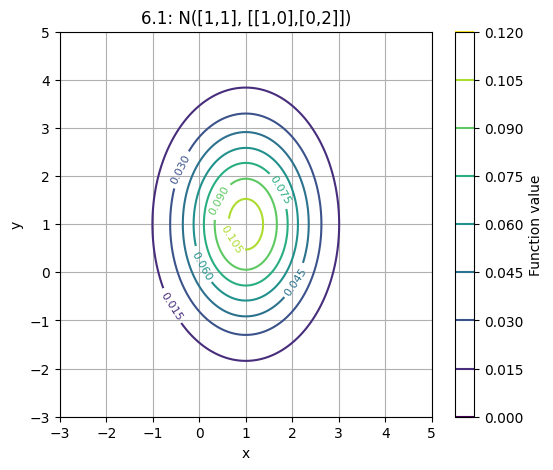

In [14]:
#6.1
mu_1 = [1, 1]
Sig_1 = np.array([[1, 0],
                    [0, 2]])
def func_part1(x, y):
    return bivar_norm_pdf(x, y, mu_1, Sig_1)
# choosing domain boundaries to show shape of isocontour
x_range = (-3, 5)
y_range = (-3, 5)
plot_isocontours(func_part1, x_range, y_range, title="6.1: N([1,1], [[1,0],[0,2]])")

Q6.2

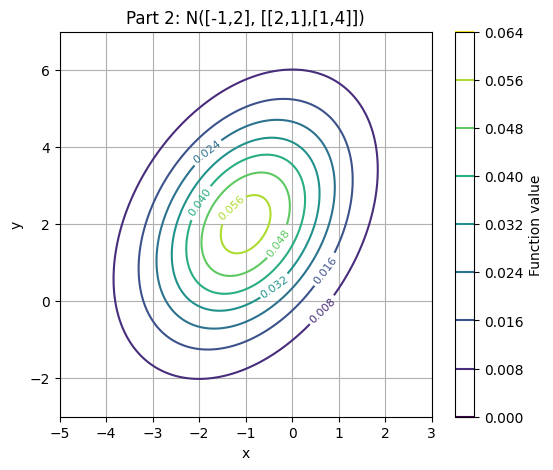

In [24]:
# 6.2
mu_2 = [-1, 2]
Sig_2 = np.array([[2, 1],
                    [1, 4]])
def func_part2(x, y):
    return bivar_norm_pdf(x, y, mu_2, Sig_2)
x_range = (-5, 3)
y_range = (-3, 7)
plot_isocontours(func_part2, x_range, y_range, title="Part 2: N([-1,2], [[2,1],[1,4]])")

Q 6.3

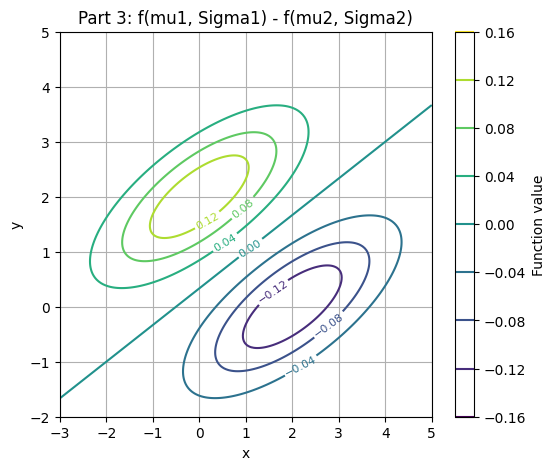

In [25]:
# 6.3
mu1_part3 = [0, 2]
mu2_part3 = [2, 0]
Sig1_part3 = np.array([[2, 1],
                         [1, 1]])
Sig2_part3 = np.array([[2, 1],
                         [1, 1]])  # same as Sig1
def func_part3(x, y):
    val1 = bivar_norm_pdf(x, y, mu1_part3, Sig1_part3)
    val2 = bivar_norm_pdf(x, y, mu2_part3, Sig2_part3)
    return val1 - val2
x_range = (-3, 5)
y_range = (-2, 5)
plot_isocontours(func_part3, x_range, y_range, title="Part 3: f(mu1, Sigma1) - f(mu2, Sigma2)")

Q 6.4

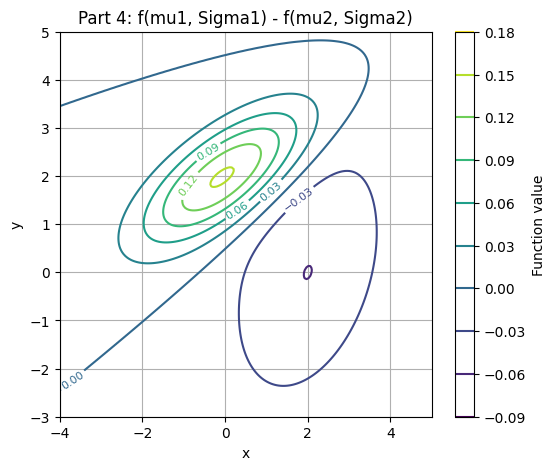

In [28]:
#6.4
mu1_part4 = [0, 2]
mu2_part4 = [2, 0]
Sig1_part4 = np.array([[2, 1],
                         [1, 1]])
Sig2_part4 = np.array([[2, 1],
                         [1, 4]])
def func_part4(x, y):
    val1 = bivar_norm_pdf(x, y, mu1_part4, Sig1_part4)
    val2 = bivar_norm_pdf(x, y, mu2_part4, Sig2_part4)
    return val1 - val2
x_range = (-4, 5)
y_range = (-3, 5)
plot_isocontours(func_part4, x_range, y_range, title="Part 4: f(mu1, Sigma1) - f(mu2, Sigma2)")

Q 6.5

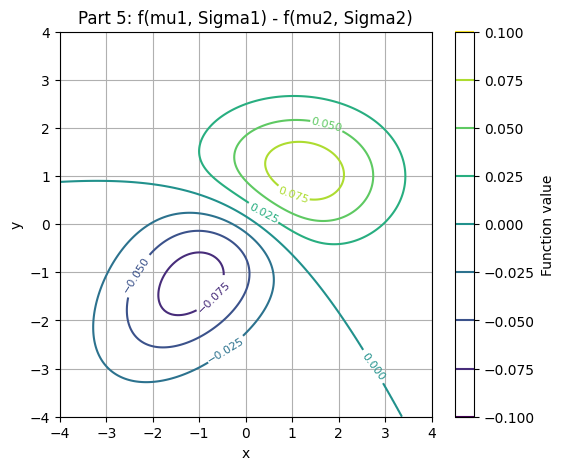

In [ ]:
# 6.5
mu1_part5 = [1, 1]
mu2_part5 = [-1, -1]
Sig1_part5 = np.array([[2, 0],
                         [0, 1]])
Sig2_part5 = np.array([[2, 1],
                         [1, 2]])
def func_part5(x, y):
    val1 = bivar_norm_pdf(x, y, mu1_part5, Sig1_part5)
    val2 = bivar_norm_pdf(x, y, mu2_part5, Sig2_part5)
    return val1 - val2
x_range = (-4, 4)
y_range = (-4, 4)
plot_isocontours(func_part5, x_range, y_range, title="Part 5: f(mu1, Sigma1) - f(mu2, Sigma2)")

Question 7: Eigenvectors of the Gaussian Covariance Matrix

In [30]:
import numpy as np
import matplotlib.pyplot as plt 
# random seed
np.random.seed(24)
# num of samples
n = 100

Q 7.1

In [55]:
# generating the data 
X1_mean, X1_std = 3, 3  #given that X1 normal distributed (3, 9)
Y_mean, Y_std = 4, 2

X1_samp = np.random.normal(loc=X1_mean, scale=X1_std, size=n)
Y_samp =  np.random.normal(loc=Y_mean, scale=Y_std, size=n)
X2_samp = 0.5*X1_samp+Y_samp
# put together into a 2d array: shape(n, 2)
data = np.column_stack((X1_samp, X2_samp))

##sample mean computation 
mean_of_sample = np.mean(data, axis=0)
print("\nSample Mean (in R^2):", mean_of_sample)


Sample Mean (in R^2): [3.35515175 5.52070882]


Q 7.2

In [56]:
## compute the 2x2 matric (MLE version of sample covar)

data_centered = data - mean_of_sample
#mle covar : (1/n) * sum of the outer products
mle_covar = (data_centered.T @ data_centered) / n 
print("Sample Covariance Matrix (2x2):\n", mle_covar)

Sample Covariance Matrix (2x2):
 [[8.22869989 5.05367583]
 [5.05367583 7.47157096]]


Q 7.3

In [57]:
## Computing Eigenvectors and Eigenvalues
eigenval, eigenvec = np.linalg.eig(mle_covar)
#sorting from largest to smallest eigenval
sorted_indexs = np.argsort(eigenval)[::-1]
eigenval = eigenval[sorted_indexs]
eigenvec = eigenvec[:, sorted_indexs]

print("Eigenvalues (largest first):", eigenval)
print("Eigenvectors (columns correspond to eigenvalues above):\n", eigenvec)

Eigenvalues (largest first): [12.91797031  2.78230054]
Eigenvectors (columns correspond to eigenvalues above):
 [[ 0.73304142 -0.680184  ]
 [ 0.680184    0.73304142]]


Q 7.4

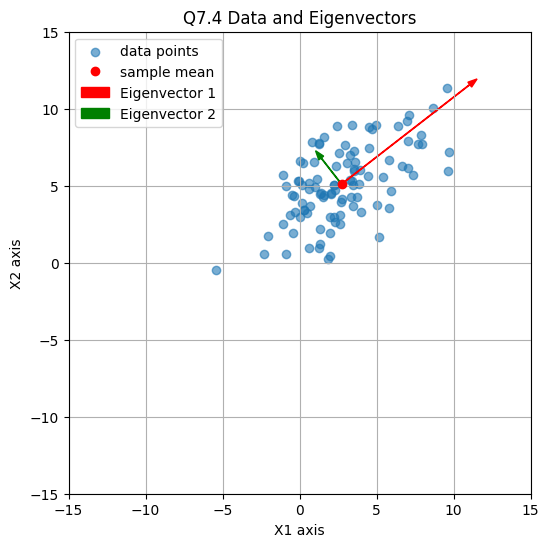

In [53]:
## plotting data points and eigenvectors 
plt.figure(figsize=(6,6))
#scatter plot of 100 data points 
plt.scatter(data[:,0], data[:,1], alpha=0.6, label="data points")
#plotting the mean as a point too 
plt.plot(mean_of_sample[0], mean_of_sample[1], 'ro', label="sample mean")
#plotting eigenvector arros 
for i in range(2): 
    #origin = mean_of_sample
    #direction = eigenvec[:, i]
    #length = eigenval[i]
    vector = eigenvec[:, i] * eigenval[i]
    plt.arrow(mean_of_sample[0], mean_of_sample[1], 
                vector[0], vector[1], 
                color=('r' if i==0 else 'g'), 
                width=0.03, 
                head_width=0.4,
                length_includes_head=True, 
                label=f"Eigenvector {i+1}")
# setting axis rabges and aspect ratio
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Q7.4 Data and Eigenvectors")
plt.ylabel("X2 axis")
plt.xlabel("X1 axis")
plt.legend()
plt.grid(True)
plt.show()

Q 7.5 

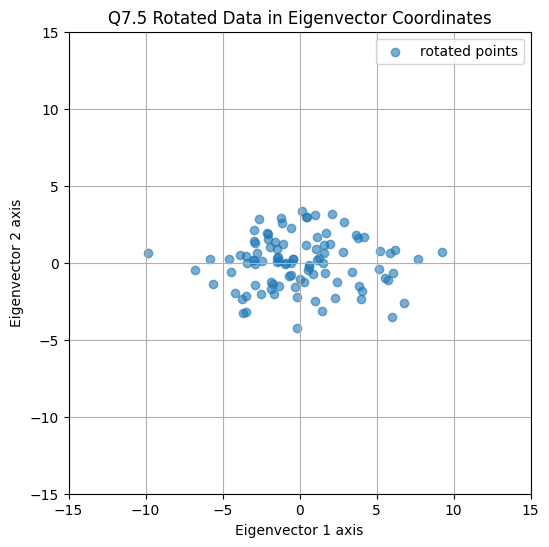

In [52]:
## rotating points into eigentvector coordinates 
U = eigenvec 
data_centered = data - mean_of_sample 

# rotate each point 
data_rotated = data_centered @ U 

# plot rotated data 
plt.figure(figsize=(6,6))
plt.scatter(data_rotated[:,0], data_rotated[:,1], alpha=0.6, label="rotated points")
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Q7.5 Rotated Data in Eigenvector Coordinates")
plt.ylabel("Eigenvector 2 axis")
plt.xlabel("Eigenvector 1 axis")
plt.legend()
plt.grid(True)
plt.show()